In [1]:
import pandas as pd
import os
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
working_dir = r'../../../outputs/agg/dash'
fname = 'tour_purpose_mode'

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Primary Tour Mode

In [4]:
pd.options.display.float_format = '{:,.1%}'.format

df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = (df_model.groupby('tmodetp').sum()[['toexpfac']]/df_model['toexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('tmodetp').sum()[['toexpfac']]/df_survey['toexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='tmodetp', suffixes=['_model','_survey'])
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,1.2%,0.5%
HOV2,25.5%,22.5%
HOV3+,20.7%,26.7%
Park,1.0%,0.4%
SOV,34.3%,32.7%
School Bus,2.8%,2.0%
TNC,1.5%,0.3%
Transit,3.6%,6.4%
Walk,9.4%,7.6%


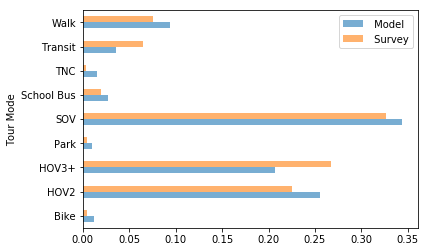

In [5]:
df.plot(kind='barh', alpha=0.6)

# Work Tour Mode

In [6]:
pd.options.display.float_format = '{:,.1%}'.format

df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[df_model['pdpurp'] == 'Work']
df_survey = df_survey[df_survey['pdpurp'] == 'Work']
df_model = (df_model.groupby('tmodetp').sum()[['toexpfac']]/df_model['toexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('tmodetp').sum()[['toexpfac']]/df_survey['toexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='tmodetp', suffixes=['_model','_survey'])
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,1.1%,0.7%
HOV2,19.1%,16.5%
HOV3+,9.9%,11.5%
Park,3.2%,1.1%
SOV,55.7%,54.1%
TNC,0.9%,0.6%
Transit,6.3%,10.8%
Walk,3.8%,3.7%


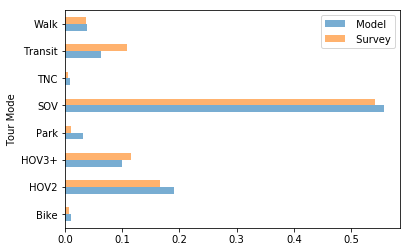

In [7]:
df.plot(kind='barh', alpha=0.6)

# School Tour Mode

In [8]:
pd.options.display.float_format = '{:,.1%}'.format

df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[df_model['pdpurp'] == 'School']
df_survey = df_survey[df_survey['pdpurp'] == 'School']
df_model = (df_model.groupby('tmodetp').sum()[['toexpfac']]/df_model['toexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('tmodetp').sum()[['toexpfac']]/df_survey['toexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='tmodetp', suffixes=['_model','_survey'])
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,2.7%,0.2%
HOV2,21.4%,11.9%
HOV3+,27.6%,43.4%
SOV,8.9%,9.4%
School Bus,25.5%,17.0%
TNC,3.4%,0.4%
Transit,5.9%,10.9%
Walk,4.6%,4.8%


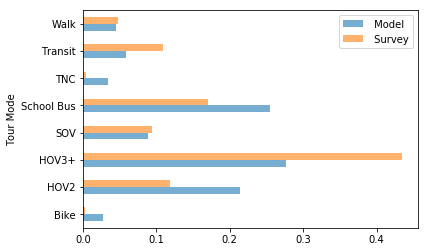

In [9]:
df.plot(kind='barh', alpha=0.6)

# Escort Tour Mode

In [10]:
pd.options.display.float_format = '{:,.1%}'.format

df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[df_model['pdpurp'] == 'Escort']
df_survey = df_survey[df_survey['pdpurp'] == 'Escort']
df_model = (df_model.groupby('tmodetp').sum()[['toexpfac']]/df_model['toexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('tmodetp').sum()[['toexpfac']]/df_survey['toexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='tmodetp', suffixes=['_model','_survey'])
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,2.1%,0.1%
HOV2,46.9%,43.4%
HOV3+,44.8%,48.7%
SOV,2.3%,3.7%
TNC,0.1%,0.0%
Transit,0.0%,0.3%
Walk,3.9%,2.8%


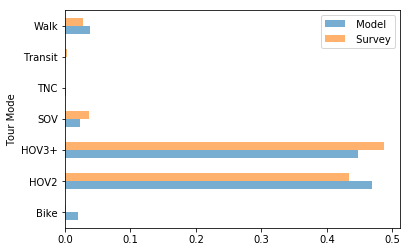

In [11]:
df.plot(kind='barh', alpha=0.6)

# Other Tour Mode

In [12]:
pd.options.display.float_format = '{:,.1%}'.format

df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[-df_model['pdpurp'].isin(['School','Work','Escort'])]
df_survey = df_survey[-df_survey['pdpurp'].isin(['School','Work','Escort'])]
df_model = (df_model.groupby('tmodetp').sum()[['toexpfac']]/df_model['toexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('tmodetp').sum()[['toexpfac']]/df_survey['toexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='tmodetp', suffixes=['_model','_survey'])
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,0.6%,0.4%
HOV2,25.2%,25.1%
HOV3+,20.1%,30.5%
SOV,34.3%,27.0%
TNC,1.8%,0.2%
Transit,2.1%,3.4%
Walk,15.8%,12.1%


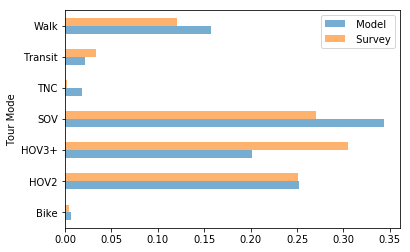

In [13]:
df.plot(kind='barh', alpha=0.6)

# Stops

## First Half Tour (Outbound)

### All Purposes

In [14]:
fname = 'tour_stops_outbound'
df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))

df_model['source'] = 'Model'
df_survey['source'] = 'Survey'
df = df_model.append(df_survey)

In [15]:
_df = df.pivot_table(index='tripsh2', columns='source', values='toexpfac', aggfunc='sum')
_df = _df.fillna(0)
_df['Model'] = _df['Model']/_df['Model'].sum()
_df['Survey'] = _df['Survey']/_df['Survey'].sum()
_df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
_df

source,Model,Survey
tripsh2,,
100.0%,62.6%,58.5%
200.0%,25.3%,23.2%
300.0%,8.6%,8.9%
400.0%,2.1%,4.6%
500.0%,0.8%,2.1%
600.0%,0.1%,0.8%


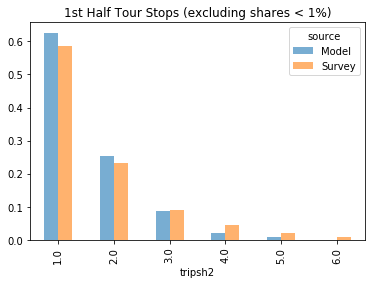

In [16]:
_df.plot(kind='bar', alpha=0.6, title='1st Half Tour Stops (excluding shares < 1%)')

### By Purpose

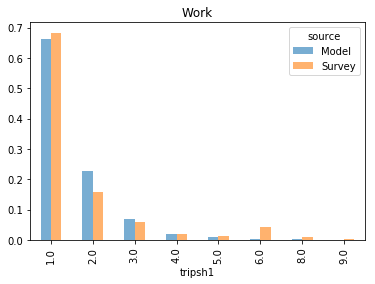

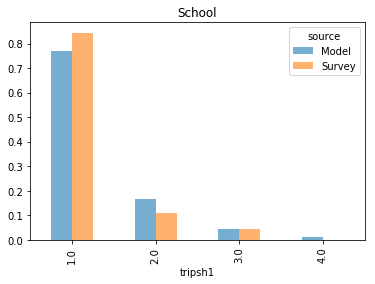

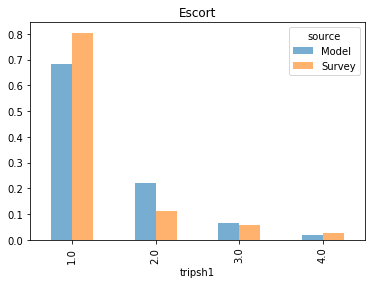

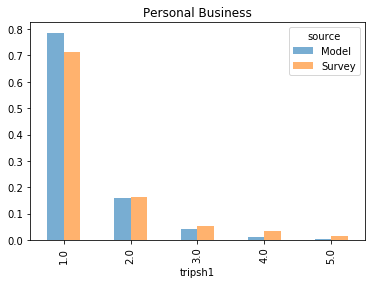

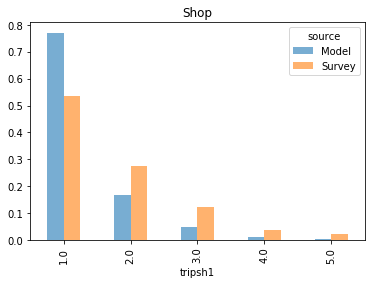

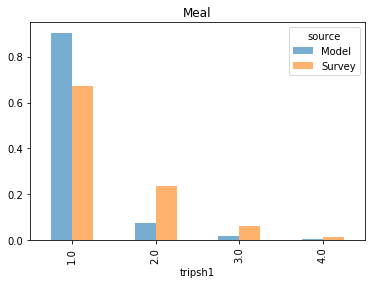

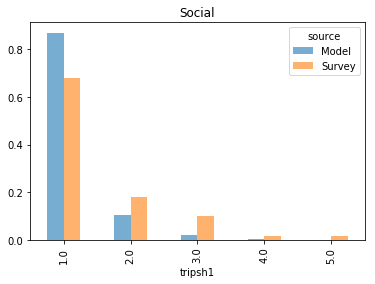

In [17]:
for purp in df['pdpurp'].unique():
    _df = df[df['pdpurp'] == purp]
    _df = _df.pivot_table(index='tripsh1', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)


## Second Half Tour (Return/Inbound)

### All Purposes

In [18]:
_df = df.pivot_table(index='tripsh2', columns='source', values='toexpfac', aggfunc='sum')
_df = _df.fillna(0)
_df['Model'] = _df['Model']/_df['Model'].sum()
_df['Survey'] = _df['Survey']/_df['Survey'].sum()
_df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
_df

source,Model,Survey
tripsh2,,
100.0%,62.6%,58.5%
200.0%,25.3%,23.2%
300.0%,8.6%,8.9%
400.0%,2.1%,4.6%
500.0%,0.8%,2.1%
600.0%,0.1%,0.8%


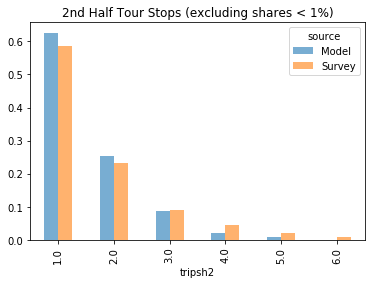

In [19]:
_df.plot(kind='bar', alpha=0.6, title='2nd Half Tour Stops (excluding shares < 1%)')

### By Purpose

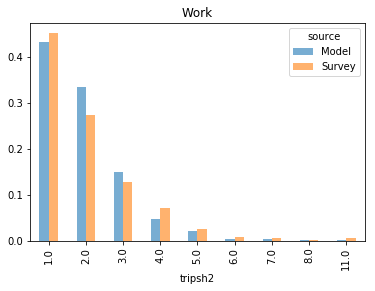

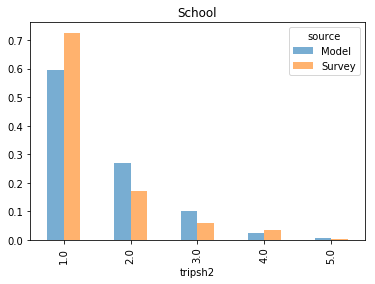

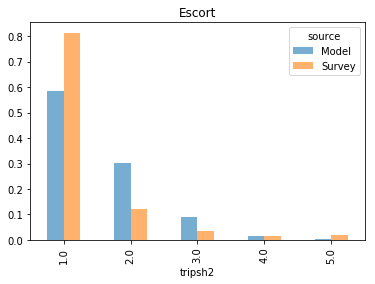

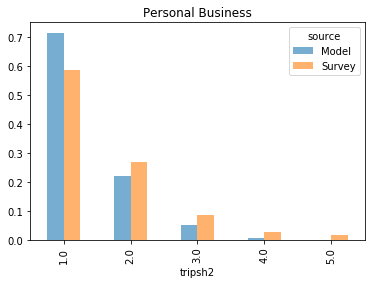

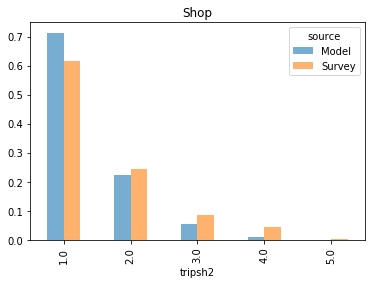

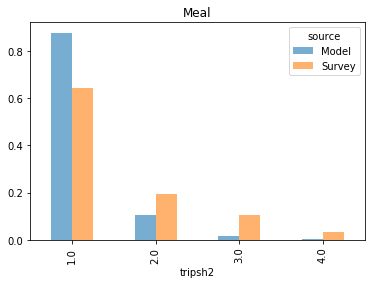

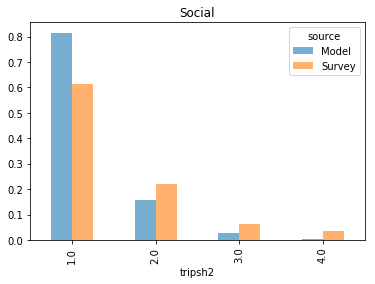

In [20]:
for purp in df['pdpurp'].unique():
    _df = df[df['pdpurp'] == purp]
    _df = _df.pivot_table(index='tripsh2', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)


# All Stops

### All Purposes

In [21]:
df['all_stops'] = df['tripsh1'] + df['tripsh2']
_df = df.pivot_table(index='all_stops', columns='source', values='toexpfac', aggfunc='sum')
_df = _df.fillna(0)
_df['Model'] = _df['Model']/_df['Model'].sum()
_df['Survey'] = _df['Survey']/_df['Survey'].sum()
_df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
_df

source,Model,Survey
all_stops,,
200.0%,51.9%,45.5%
300.0%,24.4%,22.0%
400.0%,13.5%,13.3%
500.0%,5.7%,8.8%
600.0%,2.4%,3.4%
700.0%,0.9%,2.3%
800.0%,0.4%,1.6%
900.0%,0.2%,0.5%
"1,000.0%",0.1%,0.2%


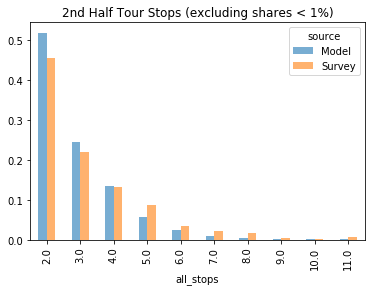

In [22]:
_df.plot(kind='bar', alpha=0.6, title='2nd Half Tour Stops (excluding shares < 1%)')

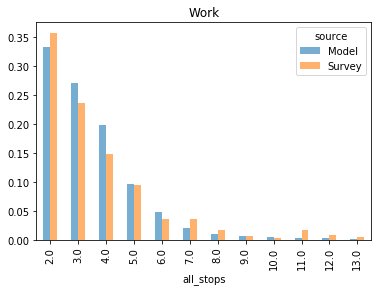

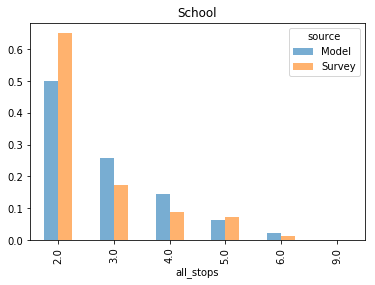

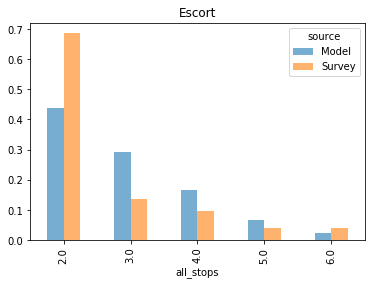

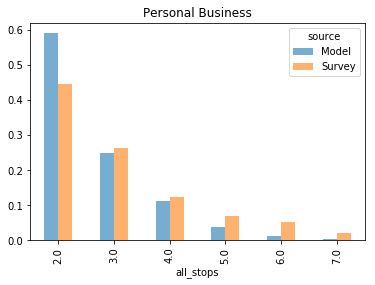

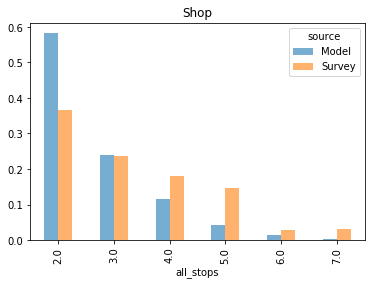

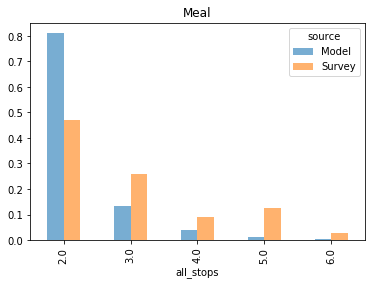

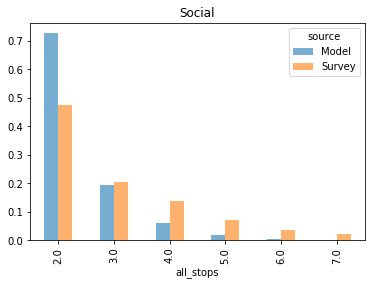

In [23]:
for purp in df['pdpurp'].unique():
    _df = df[df['pdpurp'] == purp]
    _df = _df.pivot_table(index='all_stops', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)
